In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
import os
from tk3d_func import data_setup, trim_data, sensor_region, find_region_by_sensor, display_pressure_from_df
from tk3d_func import batch_process_data, calculate_metrics, run_anova, prepare_anova_df

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Coordinates sensors map
medilojic_coor = pd.read_csv("sensorkoordinaten_inMM_v2.csv") # sensor_area = 1.12523264

# if apply calibration pressure factor. TO BE REEVALUATED
wlan_insole_pressure_factor = {"39":1.110187127, 
                               "43":1.017823678,
                               "45":1.329935695}

# map to rename title / files
name_map = {"standing":"Standing",            
            "pressure":"I1",
            "shape":"I2",
            "full":"I3",
            "standard0709":"I0",
            "P1":"S01",
            "barefoot":"B0"}

weight_dict = {'P1':77.75}

# DATA SETUP

In [3]:
participants_id = ["P1"]
insoles_design = ["barefoot", "full", "pressure", "shape", "standard0709"]
tests = ["standing"]

data_dict, AVG_dict = batch_process_data(participants_id, insoles_design, tests, medilojic_coor)

# ANOVA analysis

In [4]:
# create separate dictionary for foot region
FF_dict = {}
MF_dict = {}
RF_dict = {}

AVG_FF_dict = {}
AVG_MF_dict = {}
AVG_RF_dict = {}

for key in AVG_dict.keys():
    df = AVG_dict.get(key)
    AVG_FF_dict[key] = df.loc[df['region'].str.contains("FF", case=False, na=False)]
    AVG_MF_dict[key] = df.loc[df['region'].str.contains("MF", case=False, na=False)]
    AVG_RF_dict[key] = df.loc[df['region'].str.contains("RF", case=False, na=False)]    

for key in data_dict.keys():
    df = data_dict.get(key)
    FF_dict[key] = df.loc[df['region'].str.contains("FF", case=False, na=False)]
    MF_dict[key] = df.loc[df['region'].str.contains("MF", case=False, na=False)]
    RF_dict[key] = df.loc[df['region'].str.contains("RF", case=False, na=False)]


In [5]:
data_dict, AVG_dict = calculate_metrics(data_dict, AVG_dict, weight_dict)
FF_dict, AVG_FF_dict = calculate_metrics(FF_dict, AVG_FF_dict, weight_dict)
MF_dict, AVG_MF_dict = calculate_metrics(MF_dict, AVG_MF_dict, weight_dict)
RF_dict, AVG_RF_dict = calculate_metrics(RF_dict, AVG_RF_dict, weight_dict)

In [6]:
data_dict.get("P1_barefoot_standing_R_3")

,x,y,sensor number,Minimum,Maximum,20% Average,region,shape,mapping,id,...,trial,stdPressure,peakPressure,meanPressure,cvPressure,avg_by_weight,stdPressure_bw,peakPressure_bw,meanPressure_bw,cvPressure_bw
0,77.7552,119.04,29,0.625611,4.379277,1.251222,lat_FF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.018461,0.765918,2.54768,0.576401,1.328794
1,70.2736,119.04,30,23.147600,26.275660,23.773220,central_FF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.350768,0.765918,2.54768,0.576401,1.328794
2,62.7920,119.04,31,50.048880,54.428150,51.300100,central_FF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.756919,0.765918,2.54768,0.576401,1.328794
3,55.3104,119.04,32,11.886610,13.137830,12.512220,central_FF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.184615,0.765918,2.54768,0.576401,1.328794
4,47.6952,119.04,33,52.551320,55.053760,54.428150,med_FF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.803073,0.765918,2.54768,0.576401,1.328794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,77.7552,-120.96,221,9.384164,28.152490,21.270770,lat_RF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.313845,0.765918,2.54768,0.576401,1.328794
147,70.2736,-120.96,222,36.285440,58.181820,49.423270,lat_RF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.729227,0.765918,2.54768,0.576401,1.328794
148,62.7920,-120.96,223,43.167160,68.817210,58.807430,med_RF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.867688,0.765918,2.54768,0.576401,1.328794
149,55.3104,-120.96,224,5.630499,6.881720,6.256109,med_RF,0,0,P1,...,3,51.909957,172.6686,39.065467,1.328794,0.092307,0.765918,2.54768,0.576401,1.328794


In [7]:
designs = ["standard0709", "pressure", "shape", "full"]
data_anova = prepare_anova_df(data_dict, designs)
AVG_anova = prepare_anova_df(AVG_dict, designs)
FF_anova = prepare_anova_df(FF_dict, designs)
MF_anova = prepare_anova_df(MF_dict, designs)
RF_anova = prepare_anova_df(RF_dict, designs)

            x       y  sensor number     Minimum    Maximum  20% Average  \
0    -77.7552  119.04             29   63.186710   76.95014     69.44282   
1    -70.2736  119.04             30   31.280550   33.78299     32.53177   
2    -62.7920  119.04             31   13.137830   14.38905     13.13783   
3    -55.3104  119.04             32   16.265880   19.39394     16.89150   
4    -47.6952  119.04             33  124.496600  129.50150    126.37340   
...       ...     ...            ...         ...        ...          ...   
4374  77.7552 -120.96            221   20.019550   35.03421     24.39883   
4375  70.2736 -120.96            222   23.773220   37.53666     26.27566   
4376  62.7920 -120.96            223   15.640270   28.77810     21.27077   
4377  55.3104 -120.96            224    8.758553   12.51222     10.00978   
4378  47.6952 -120.96            225    0.000000    0.00000      0.00000   

          region  shape  mapping  id  ... trial stdPressure peakPressure  \
0         l

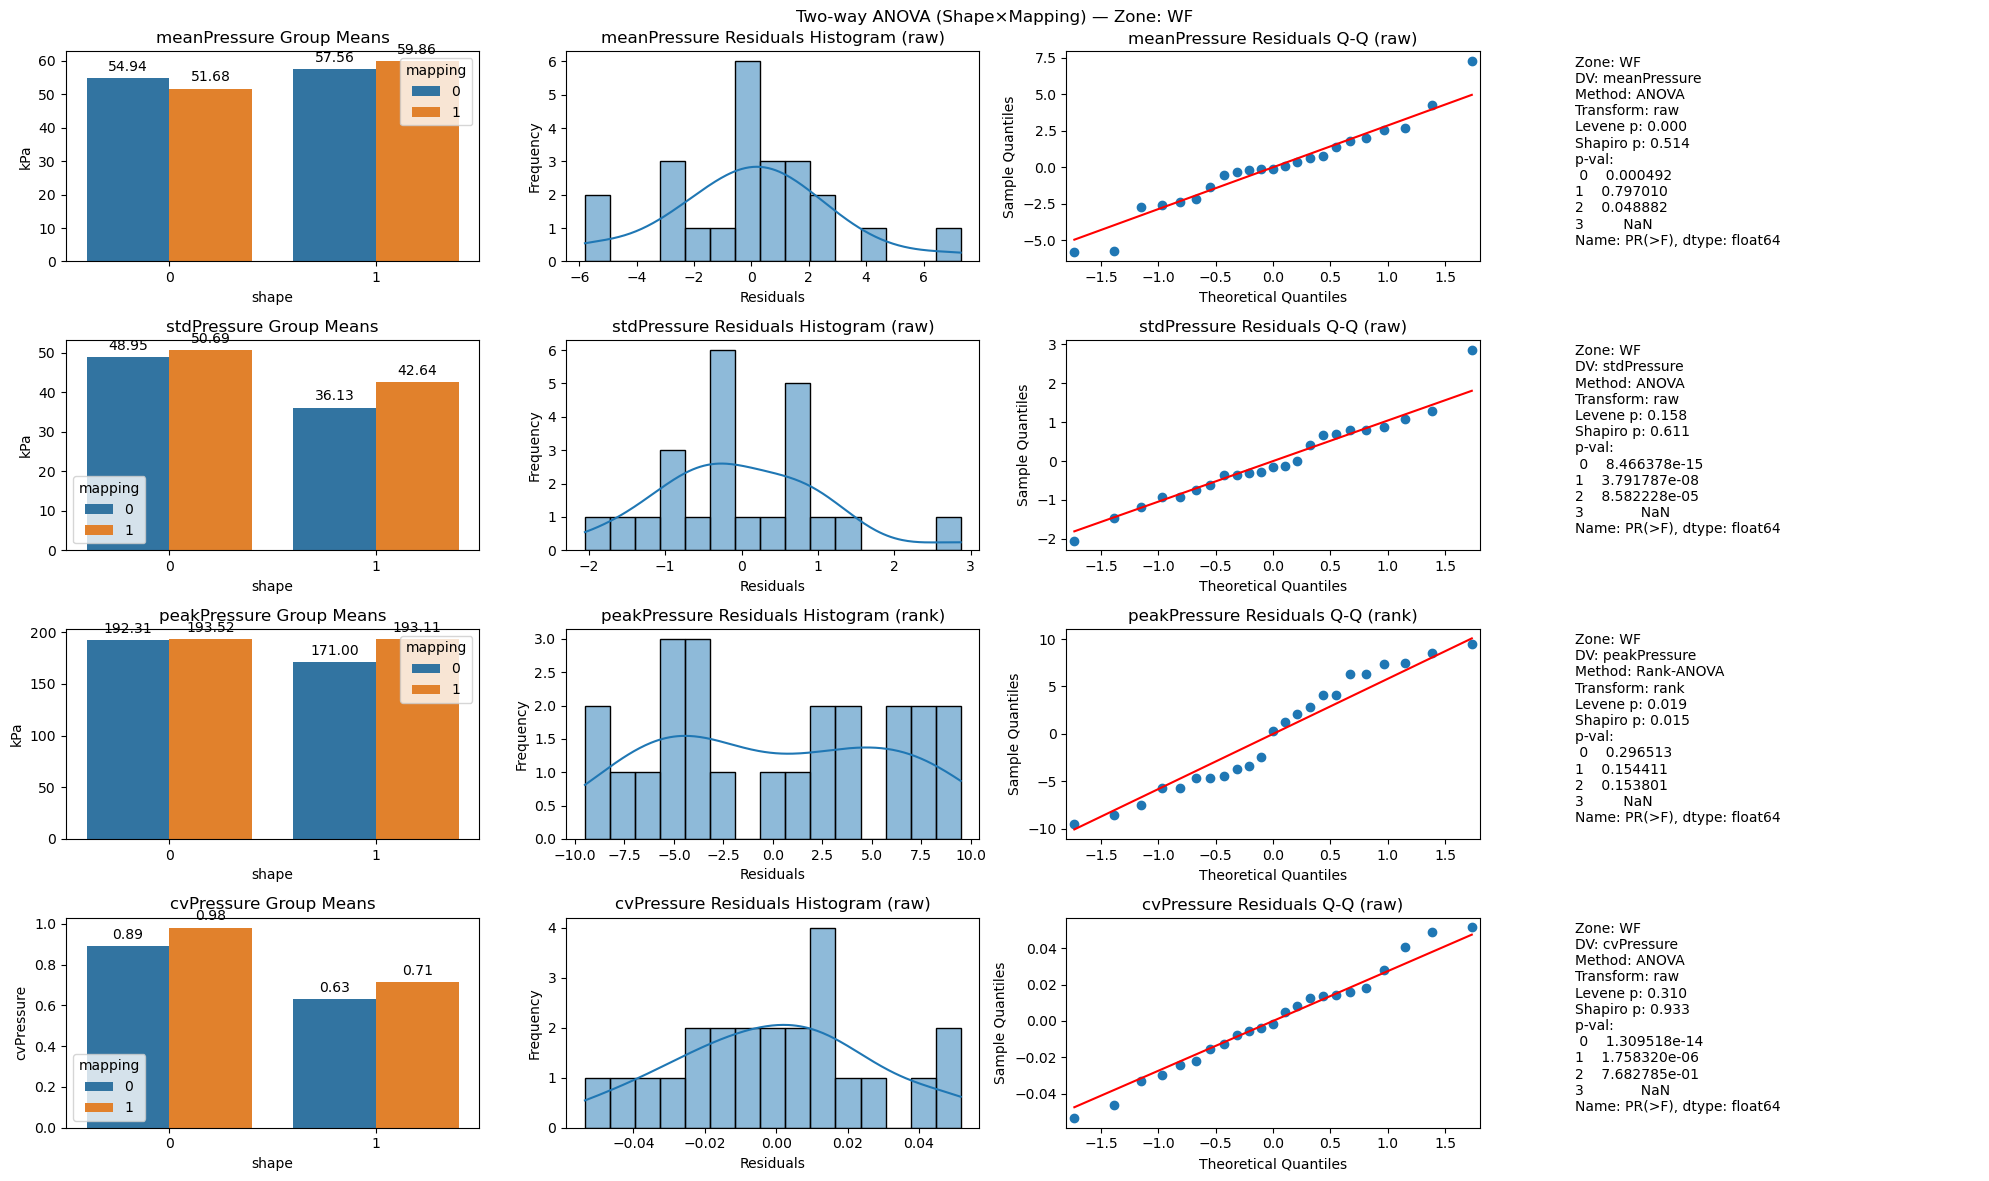

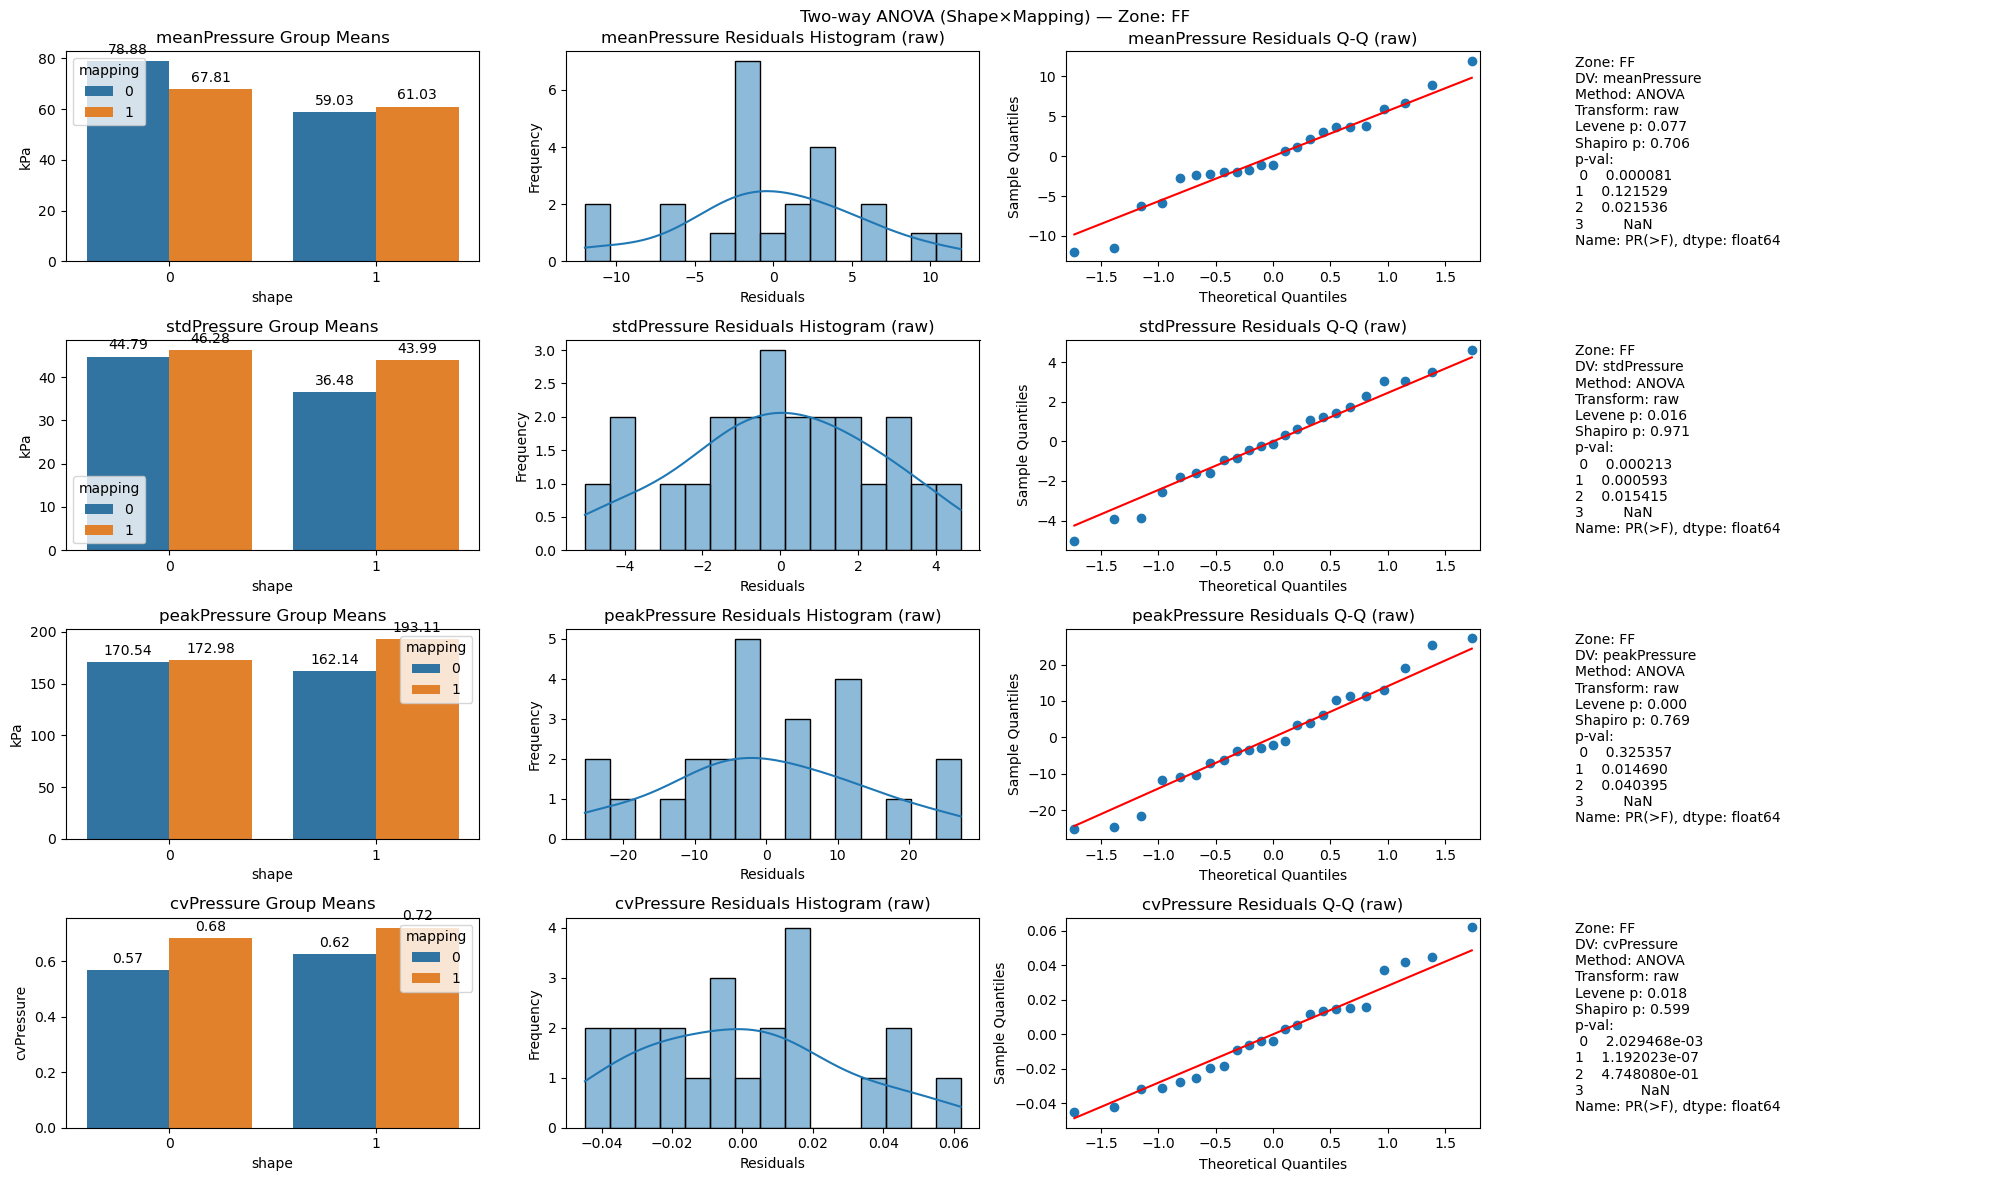

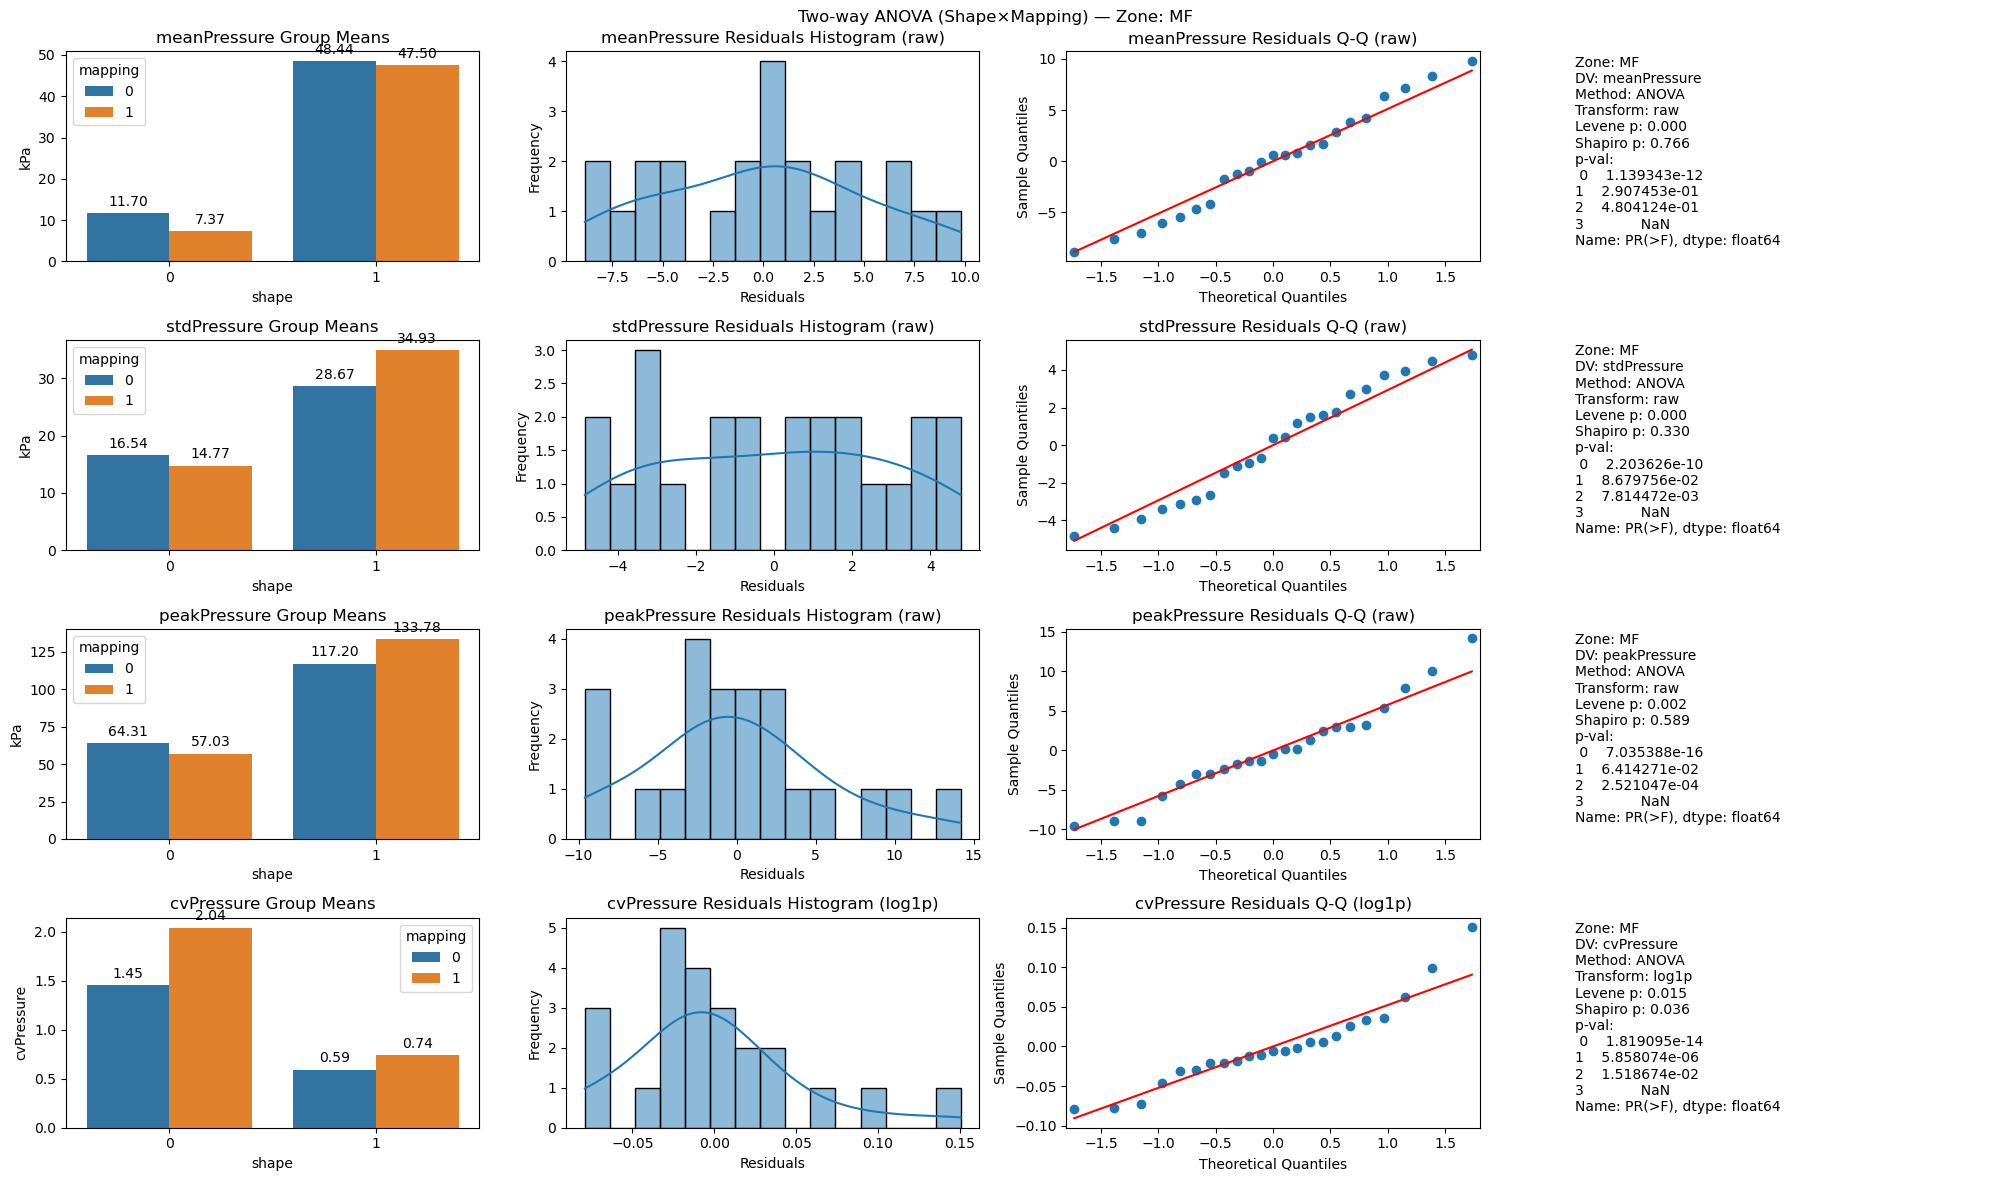

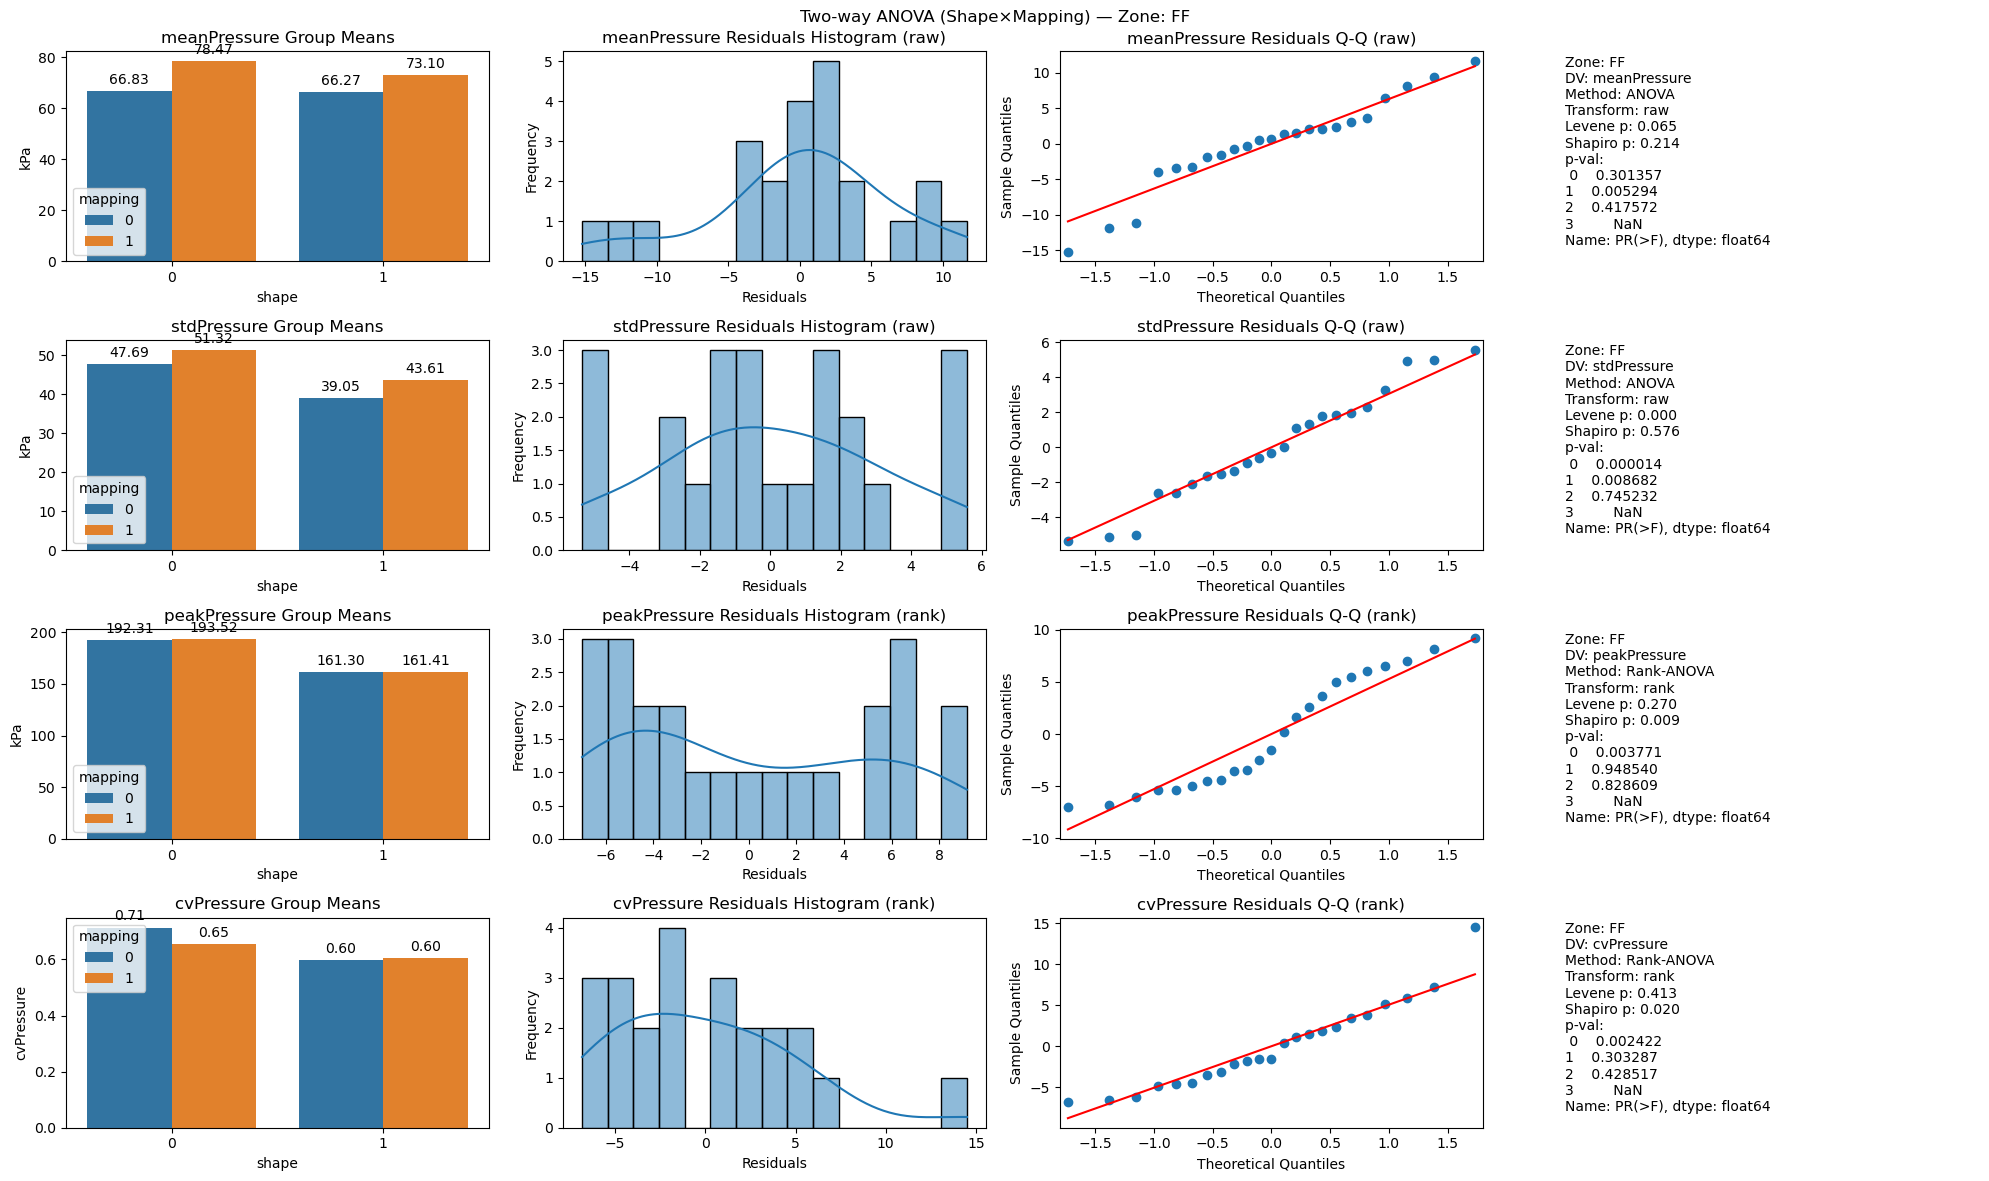

In [8]:
dvs = ["meanPressure", "stdPressure", "peakPressure", "cvPressure"]

WF_results = run_anova(data_anova, "WF", dvs)
FF_results = run_anova(FF_anova, "FF", dvs)
MF_results = run_anova(MF_anova, "MF", dvs)
RF_results = run_anova(RF_anova, "FF", dvs)

In [9]:
FF_results

,Zone,DependentVariable,index,sum_sq,df,F,PR(>F),Method,Transform,EtaSq_partial,Reject_Null
0,FF,meanPressure,C(shape),968.885322,1.0,24.924198,8.085806e-05,ANOVA,raw,0.567437,Yes
1,FF,meanPressure,C(mapping),102.125198,1.0,2.627131,1.215294e-01,ANOVA,raw,0.121474,No
2,FF,meanPressure,C(shape):C(mapping),243.831234,1.0,6.272464,2.153561e-02,ANOVA,raw,0.248194,Yes
3,FF,meanPressure,Residual,738.592325,19.0,NaN,NaN,ANOVA,raw,0.500000,No
4,FF,stdPressure,C(shape),151.934502,1.0,20.817227,2.127442e-04,ANOVA,raw,0.522820,Yes
5,FF,stdPressure,C(mapping),123.400641,1.0,16.907675,5.934098e-04,ANOVA,raw,0.470865,Yes
6,FF,stdPressure,C(shape):C(mapping),51.699933,1.0,7.083640,1.541514e-02,ANOVA,raw,0.271574,Yes
7,FF,stdPressure,Residual,138.671471,19.0,NaN,NaN,ANOVA,raw,0.500000,No
8,FF,peakPressure,C(shape),244.899579,1.0,1.019359,3.253569e-01,ANOVA,raw,0.050919,No
9,FF,peakPressure,C(mapping),1730.615450,1.0,7.203435,1.468965e-02,ANOVA,raw,0.274904,Yes


# DISPLAY HEATMAP

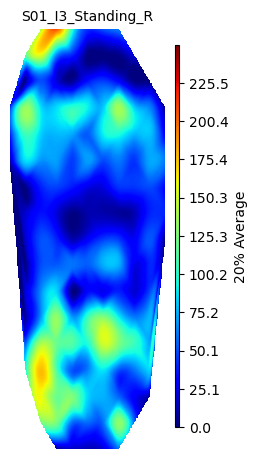

In [10]:
measure = "20% Average"
min_val = 0
max_val = 250

num_rows = 1
num_columns = 1

width = num_columns*2
height = num_rows*4*7.5/5.5

fig, ax = plt.subplots(num_rows, num_columns, figsize=(width,height))

contour = display_pressure_from_df(AVG_dict.get("P1_full_standing_R"), name_map, measure, max_val, min_val, title="P1_full_standing_R", region="WF", ax=ax)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(contour, cax=cbar_ax, fraction=0.02, orientation="vertical", location="right", label=measure)
plt.show()